In [113]:
import pandas as pd
import seaborn as sns
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.special import factorial
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip


from scipy.stats import norm
from math import sqrt
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

### 1. Importe la base de datos a una base en Jupyter Notebook con pandas.

In [114]:
df = pd.read_csv("/media/henryx/alldata/Maestri/maestria/analisis_predictivo/DummyData.csv")
print(df.size)
print(df.shape)

22860
(4572, 5)


###  2. Obtenga los descriptivos resumen de la base de datos e identifique las variables numéricas y categóricas. Indique ¿hay algo que le llame la atención? 

Podemos aprecia que en todas las variables existe una gran dispercion de los datos en especias en la variable 'TV' y 'Social Media'. Segun los quatiles, nimimo, maximo de Social Media	deben existir valores outlier. El conteo muestra que existe valores perdidos.


In [115]:

print(df.columns)
df.describe()


Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')


,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


Tenemos una base de datos con 5 variables, de las cuales 4 ('TV', 'Radio', 'Social Media',  'Sales') son numericas y una categorica. ('Influencer')

### 3. Evalúe si la base contiene datos perdidos. 

Como los datos perdidos no son muchos, los retiro de mi base de datos: Otra manera de manejarlos es remplazarlos con algun estiamos como a media o la mediana.

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64


<AxesSubplot:>

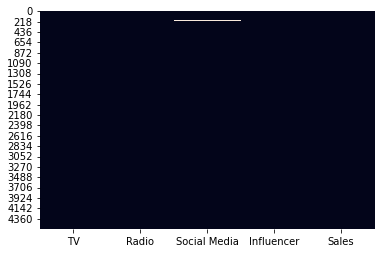

In [116]:

print(df.isnull().sum())
# la base si contiene datos perdidos en total 26. 
sns.heatmap(df.isnull(), cbar=False)

In [117]:
df.dropna(inplace=True)  
df.shape

(4546, 5)

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir. 

<AxesSubplot:>

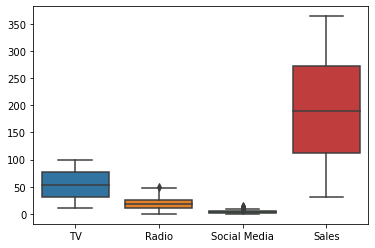

In [118]:
# vemos que si existen datos atipicos en las variables numericas
sns.boxplot(data= df ) 


<AxesSubplot:xlabel='Social Media'>

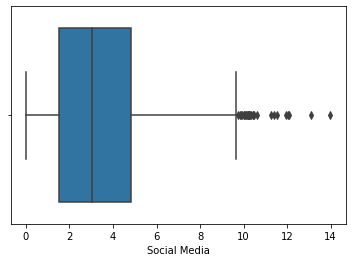

In [119]:

sns.boxplot(x= df['Social Media'] ) 

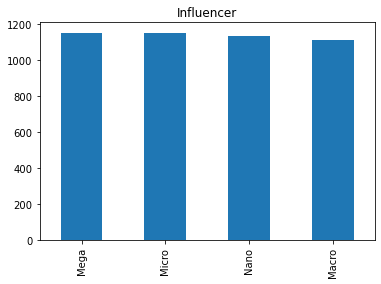

In [120]:
df['Influencer'].value_counts().plot(kind='bar', title=str('Influencer'))
plt.show()
# no existes valores irregulares en la variable categorica

Podemos apreciar que realmente existen valores atipicos. En la valiable 'Radio' y en la variable 'Social Media'. Como no representan un gran numero los vamos a descartar utilizando la diferencia de los cuartiles.



In [121]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Radio.quantile(0.25)
Q3 = df.Radio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Radio'] < (Q1 - 1.5 * IQR)) |(df['Radio'] > (Q3 + 1.5 * IQR)))]
df.shape

df['social_media'] = df['Social Media'] 
df=df.drop( columns='Social Media')
Q1 = df.social_media.quantile(0.25)
Q3 = df.social_media.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['social_media'] < (Q1 - 1.5 * IQR)) |(df['social_media'] > (Q3 + 1.5 * IQR)))]
df.shape

15.085248102500003
3.2732564039999996


(4517, 5)

Ya con los datos limpios podemos apreciar que el numero de filas de nuestro nuevo dataframe contiene el 98% de los datos orginales.

### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

En la siguiente figura podemos apreciar que en la variable radio tenemos una distribución que se asemeja a una binormal, ya que no posee una campana detallada. En el gráfico de radio si podemos apreciar que existe una distribución normal de los datos, sucede algo similar en la 'social media'. Hay que destacar que la distribución de los datos de TV y sales distribution son muy parecidos.

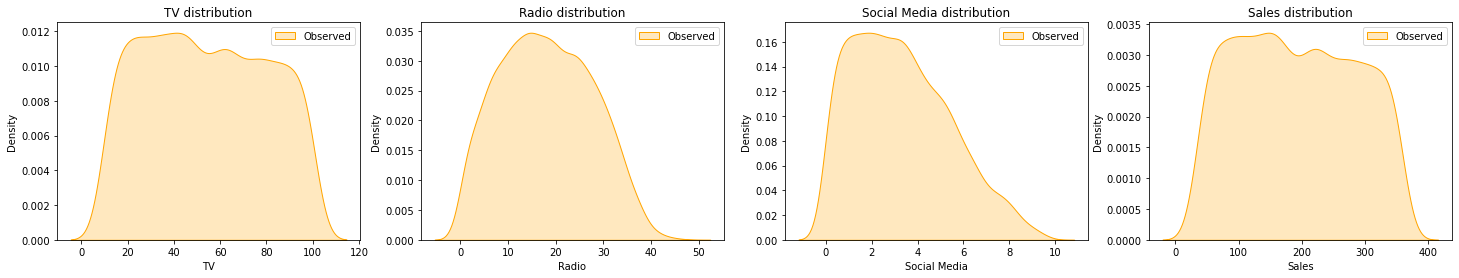

In [122]:

plt.figure(figsize=(25,4))
plt.subplot(1,4,1)
plt.title("TV distribution")
sns.kdeplot(df['TV'], shade="true", label="Observed", color = 'orange')
plt.legend()
plt.xlabel("TV")

plt.subplot(1,4,2)
plt.title("Radio distribution")
sns.kdeplot(df['Radio'], shade="true", label="Observed", color = 'orange')
plt.legend()
plt.xlabel("Radio")


plt.subplot(1,4,3)
plt.title("Social Media distribution")
sns.kdeplot(df['social_media'], shade="true", label="Observed", color = 'orange')
plt.legend()
plt.xlabel("Social Media")

plt.subplot(1,4,4)
plt.title("Sales distribution")
sns.kdeplot(df['Sales'], shade="true", label="Observed", color = 'orange')
plt.legend()
plt.xlabel("Sales")

plt.show()

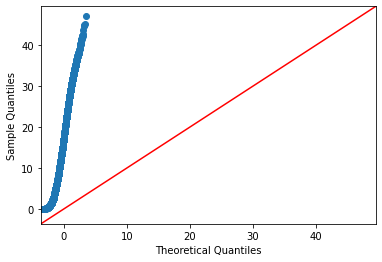

In [123]:
y= df['Radio']
fig = sm.qqplot(y, line='45')
plt.show()

Utilizando el método de  Q-Q plot podemos apreciar que los puntos se alejan de la línea roja, lo cual significa que quizá no siga una distribución normal. La distribución de Sales y Tv son muy parecidas, las cuales serán consideradas en las siguientes preguntas.

### 6. Obtenga las correlaciones entre los datos de corte numérico 

Podemos observar que la variables Sale está fuertemente correlacionado con Tv y mantiene correlación con Radio. Dado que la correlación de 'social media' y 'sales' es de 0.52 no mantiene una correlación considerable.

In [124]:
df.corr().style.background_gradient(cmap='coolwarm')

,TV,Radio,Sales,social_media
TV,1.000000,0.868617,0.999495,0.525867
Radio,0.868617,1.000000,0.868076,0.599865
Sales,0.999495,0.868076,1.000000,0.525521
social_media,0.525867,0.599865,0.525521,1.000000


### 7. Comente que variables escogetan como variable dependiente Y y que varaibles introduciran a su modelo de Regrecion Lineal como variables explicativas


Por estudios previos pudimos observar que la distribución de la variable 'Sales' y 'Tv' eran semejantes. También, se pudo observar con la correlación que la variable Sales mantiene una mayor relación con las demás variables.
Por estas razones mi variable dependiente será Sales he introduciré a mi modelo las variables 'TV' y 'Radio'. En el siguiente gráfico observamos la relación de la variable dependiente con las demás.


Index(['Sales', 'TV', 'Radio', 'social_media'], dtype='object')


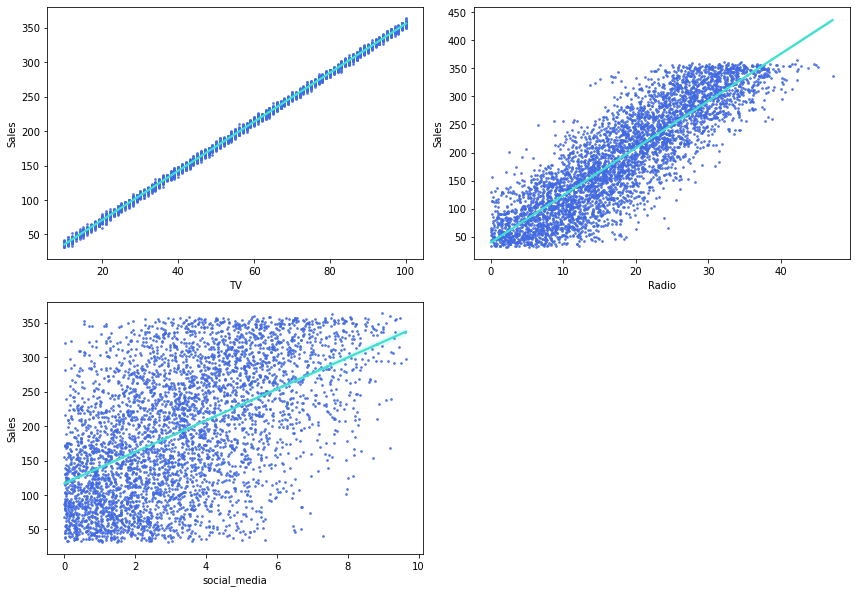

In [125]:
n = 4
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "Sales")["Sales"].index
print(cols)
# Calculate correlation
for i in np.arange(1,4):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Sales'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

### 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo, por ejemplo: 


El primer modelo obtenido sugiere un modelo
$$log sales = 3.9253  + .0226 \times  tv -0.0020 \times    radio  -0.0020  \times  socialmedia  $$
Guiandonos en el P value de influencer hemos decidido eliminar de ester primer modelo.

In [126]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.Influencer = labelencoder.fit_transform(df.Influencer)
df
log_sales=np.log(df.Sales)
df['log_sales']=log_sales

27102
(4517, 6)
                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.829e+04
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:48:00   Log-Likelihood:                 1758.7
No. Observations:                4517   AIC:                            -3509.
Df Residuals:                    4513   BIC:                            -3484.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9308      0.0

/home/henryx/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gráfica de residuos')

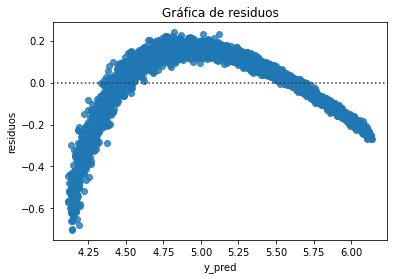

In [127]:
print(df.size)
print(df.shape)
regresion = ols("log_sales ~ TV + Radio + social_media", data=df)  
results = regresion.fit()
print(results.summary())



- ¿Bajo cuantos datos fue obtenido el modelo?

La base de datos inicial fue de 22860 datos pertenecientes a 4572 filas y 5 variables. Para este primer ajuste se utlizo 22585 pertenecientes a 4517 filas y 5 variables. Es decir el 98.7 % de los datos


- Cual es su grafico de ajuste

El radio de ajuste es de 0.92 lo indica que existe un  buen ajuste.

- hay variables significativas

Si exsiten variables significativas como es el caso de TV, radio y social media. Las podemos usar aplicando en P value ya que en estas variables podemos rechazar la hipotesis nula.

H0 : β1 = β2 = . . . = βn = 0.



- Cuales son las variables no significativas, aplicar constante de hipotesis.

Segun el p value de Influencer no se rechaza la hipotesis nula ya que 0.3 en mayor a 0.05. Es decir coeficiente de Influencer es igual a cero.


### 9. Verifique los supuestos de la RL. comente cada uno de ellos

- 1. Multicolinearidad

En los modelos lineales múltiples, los predictores deben ser independientes, no debe de haber colinealidad entre ellos. 

Segun los resultados obtenidos si existe Multicolinearidad entre las variables.


In [128]:
#print(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
df2=df[df.columns.difference(['Sales', 'log_sales', 'Influencer'])]
#print(df2)
df2=df2.apply(pd.to_numeric)
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)


        feature        VIF
0         Radio  20.888245
1            TV  18.560336
2  social_media   5.004651


2. Linealidad

Si existe linealidad en los datos

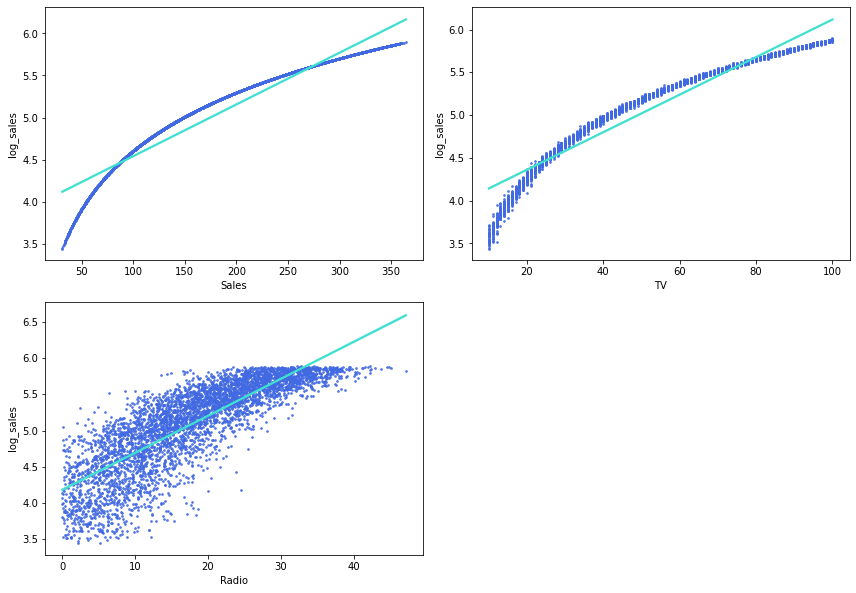

In [129]:
n = 4
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "log_sales")["log_sales"].index
# Calculate correlation
for i in np.arange(1,4):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['log_sales'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

- 3. Normalidad en los residuos

Si existe normalidad en los reciduos (por el metodo grafico q-q)


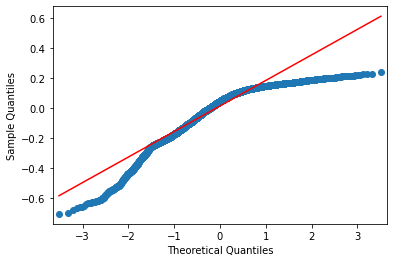

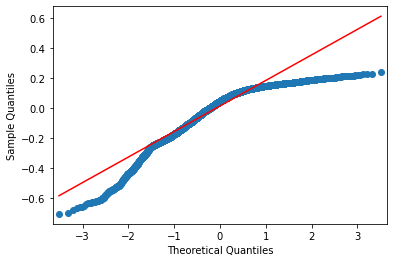

In [130]:
results_3= results
sm.qqplot(results_3.resid, line='q')

In [131]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_3.resid)
lzip(nombres, jarque_bera)
results_3.resid.mean() 

#el metodo de Jarque-Bera tambien respalda la normalidad de los reciduos.

-2.9671490709043367e-16

-4. Homocedasticidad en los residuos

Por la grafica la grafica de los recidos se puede apreciar que si existe homocedasticidad de los reciduos



Text(0.5, 1.0, 'Gráfica de residuos')

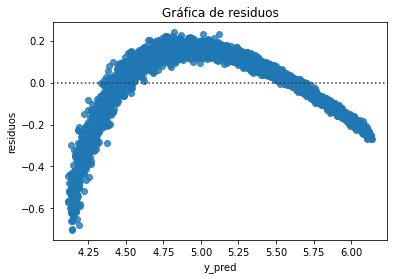

In [148]:
from math import exp
y_pred=results.predict()
sns.residplot(y_pred, results.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

### 10 Obtenga el modelo de regresión definitivo, argumente su respuesta e interprete los coeficientes. 

Deacuerdo a los resultados obtenidos previamente mi bodelo obtenido es
$$log sales = 3.9253  + .0226 \times  tv -0.0020 \times    radio  -0.0020  \times  socialmedia  $$

He decidido mantener mi modelo ya que la variable 'Influencer' mostro valores muy altos en   P>|t|.



### 11. Grafique los valores predicho del modelo vs los valores reales. 

Podemos apreciar que existe una gran similitud en los valores predichos y los valores reales, para tener una noción numérica utilizaremos la métrica MSE.

0       4.002462
1       3.843271
2       5.011820
3       5.697920
4       4.035906
          ...   
4567    4.550565
4568    5.517862
4569    5.097617
4570    5.535799
4571    4.998579
Name: log_sales, Length: 4517, dtype: float64
0       4.265684
1       4.198212
2       4.819433
3       5.725535
4       4.250746
          ...   
4567    4.507909
4568    5.467687
4569    4.868619
4570    5.500956
4571    4.828097
Length: 4517, dtype: float64


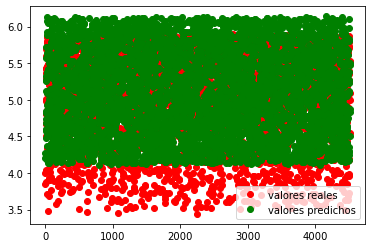

In [141]:
y_pred=results.predict(df)
y= df['log_sales']
print(y)
print(y_pred)
x= range(len(y))
plt.plot(x, y, 'ro',label = "valores reales")
plt.plot(x, y_pred, 'go', label = "valores predichos")
plt.legend()
plt.show()

- 12 Calculo de errores, Para calular los errores usaremos la metica MSE (mean square error). La cual nos ayuda a entender el error entre nuestro sistema y los valores verdaderos.

In [133]:

import math
y_pred=results.predict(df)
y_pred
mse=sum((df.log_sales-y_pred)*(df.log_sales-y_pred))/len(y_pred)
print(math.exp(mse))
print(mse)


1.0272382782476461
0.026873917908438186


Concluciones.

Gracias a las gráficas obtenidas de los errores al igual que la métrica MSE  se puede ver que nuestro sistema conformado por las variables 'TV', 'Social media' y 'radio' conforman un buen ajuste para nuestra variable dependiente 'sales'.